In [78]:
import os,sys
import h5py as h5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
from functools import partial


def make_histo(dic):
    
    station = dic['station']

    fs = 12
    plt.title('Private/Restricted records for ' + station, fontsize = fs)
    
    plt.hist([dic['free'],dic['private']],
              histtype = 'stepfilled',
              color = ['blue','orange'],
              bins = 50,
              stacked = True,
              label = ['Free '+str(len(dic['free'])),
                       'Restricted '+str(len(dic['private'])) ] )

    plt.grid(ls=':' , color='lightgray')

    plt.legend(fontsize = fs-2, loc = 'upper left')
    if not os.path.isdir('Plots'):
        os.mkdir('Plots')
        
    if not os.path.isdir('Plots/policy/'):
        os.mkdir('Plots/policy/')

    plt.tight_layout()
    plt.savefig('Plots/policy/policy_histo_' + station + '.png',
                dpi = 150 )
    
    plt.show()
    plt.close()

    
def get_data(file):
    
    dic = {'free':[],
           'private':[],
           'station': '' }

    
    try:
        station = file.split('-0-')[1].split('_CEUAS')[0]
        dic['station'] = station
        
        F = h5.File(file)

        indices = np.array(F['recordindex'][:])
        dates = np.array(F['recordtimestamp'][:])

        policy = np.array(F['observations_table']['data_policy_licence'][:])
        policy = policy[indices]

        private = np.where(policy == 4 )[0]
        free = np.where(policy == 0)[0]

        free_dates = 1900 + (dates[free]/ (365.25*60*60*24) )
        private_dates = 1900 + dates[private] / (365.25*60*60*24) 

        dic['free'] = free_dates
        dic['private'] = private_dates

    except:
        print('FAIL: ' , file )
        
    return dic
    
     

    

In [64]:
'''
f1 = '/raid60/scratch/federico/MERGED_26MAY2021/0-20000-0-17281_CEUAS_merged_v1.nc'
dic = get_data(f1, station = '17281')
dummy_plot = make_histo(dic, station= '17281')
'''

"\nf1 = '/raid60/scratch/federico/MERGED_26MAY2021/0-20000-0-17281_CEUAS_merged_v1.nc'\ndic = get_data(f1, station = '17281')\ndummy_plot = make_histo(dic, station= '17281')\n"

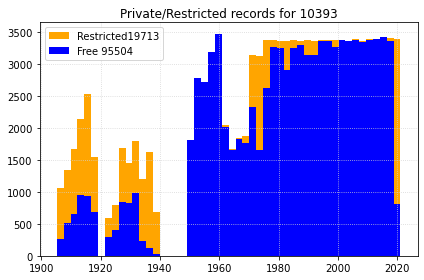

In [65]:
f = '/raid60/scratch/federico/MERGED_26MAY2021/0-20001-0-10393_CEUAS_merged_v1.nc'
dic = get_data(f)
dummy_plot = make_histo(dic)

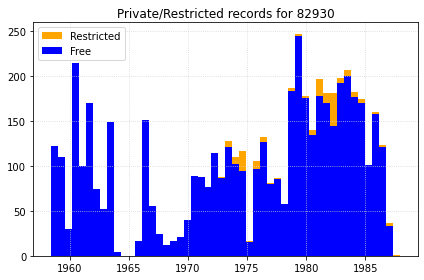

In [56]:
f = '/raid60/scratch/federico/MERGED_26MAY2021/0-20000-0-82930_CEUAS_merged_v1.nc'
dic = get_data(f)
dummy_plot = make_histo(dic)

In [57]:
#f='/raid8/srvx1/federico/GitHub/CEUAS_master_APRIL2021/CEUAS/CEUAS/public/merge/PROVA/0-20000-0-82930_CEUAS_merged_v1.nc'
#dic = get_data(f, station = '82390')
#dummy_plot = make_histo(dic, station= '82930')


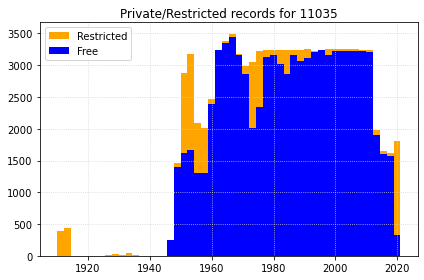

In [58]:
f = '/raid60/scratch/federico/MERGED_26MAY2021/0-20001-0-11035_CEUAS_merged_v1.nc'
dic = get_data(f)
dummy_plot = make_histo(dic)

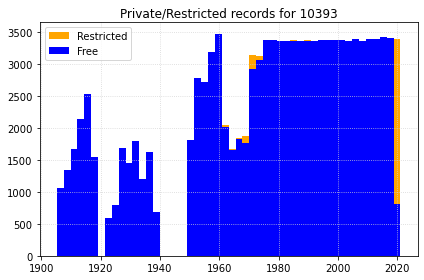

In [59]:
f = '/raid8/srvx1/federico/GitHub/CEUAS_master_APRIL2021/CEUAS/CEUAS/public/merge/PROVA/0-20001-0-10393_CEUAS_merged_v1.nc'
dic = get_data(f)
dummy_plot = make_histo(dic)

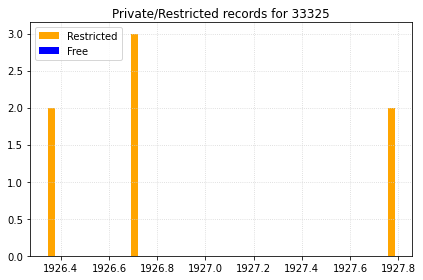

In [60]:
f = '/raid60/scratch/federico/MERGED_26MAY2021/0-20000-0-33325_CEUAS_merged_v1.nc'
dic = get_data(f)
dummy_plot = make_histo(dic)

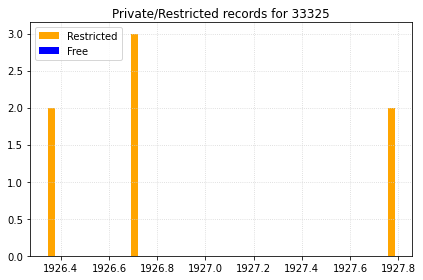

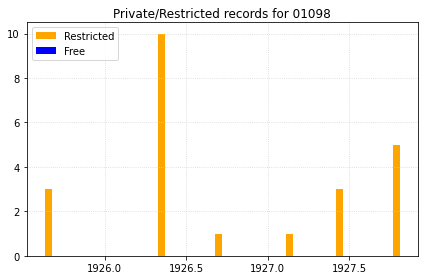

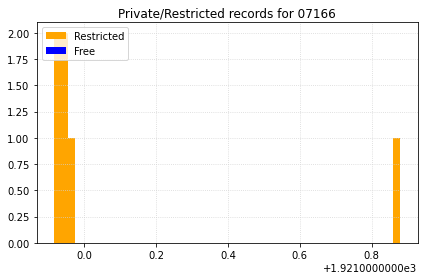

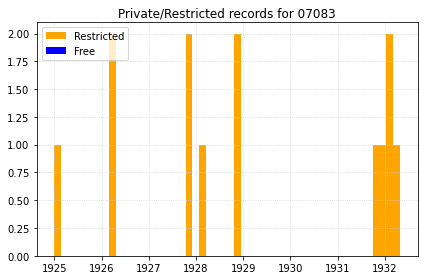

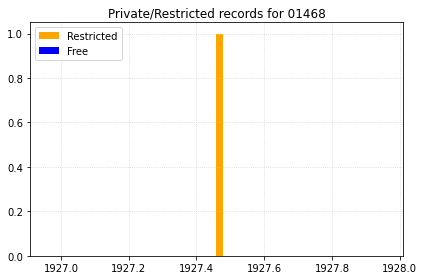

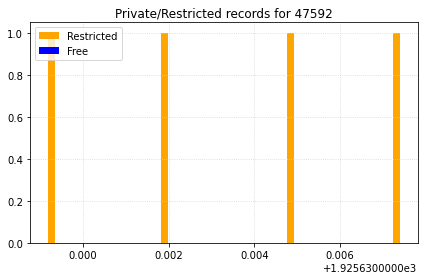

In [61]:
for s in ['33325' , '01098', '07166','07083','01468','47592']:
    f = '/raid60/scratch/federico/MERGED_26MAY2021/0-20000-0-XXXXX_CEUAS_merged_v1.nc'
    f = f.replace('XXXXX',s)
    dic = get_data(f)
    dummy_plot = make_histo(dic)

FAIL:  /raid60/scratch/federico/MERGED_26MAY2021//0-20000-0-02591_CEUAS_merged_v1.nc
FAIL:  /raid60/scratch/federico/MERGED_26MAY2021//0-20000-2-29842_CEUAS_merged_v1.nc


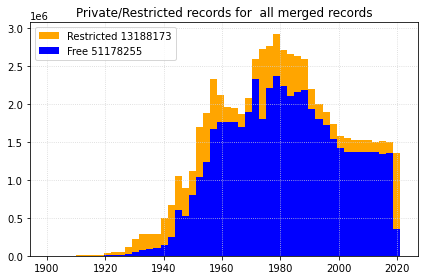

In [79]:
func = partial(get_data)
p = Pool(30)
m_dir = '/raid60/scratch/federico/MERGED_26MAY2021/'
files = [m_dir+'/'+f for f in os.listdir(m_dir) if '_beforeSensor' not in f and '.nc' in f]

#files = files[:1000]
res=list(p.map(func, files))
    
res_all = {'free': [] , 'private': [] , 'station': ' all merged records'}

for r in res:
    res_all['free'].extend(r['free'])
    res_all['private'].extend(r['private'])
    
dummy_plot = make_histo(res_all)

    